In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

## 데이터 전처리 

- DropColumns: 사용하지 않는 칼럼 제거
- DropRows: "중품" 등급은 사용할 데이터에서 제거
- ConvertDate: 날짜를 string에서 datetime 클래스로 변경
- DateTimeFEatures: ConvertDate에서 변경한 datetime클래스를 각각 피처별로 처리


Numeric Data Scaling: Tree based 모델을 사용하기 때문에 Scaler은 따로 필요 없다고 판단. outlier등만 처리 함

In [2]:
data_raw = pd.read_csv("데이터.csv")
print(data_raw.shape)
print(data_raw.columns)

(394, 22)
Index(['DATE', '요일', '품목', '품종', '거래단위', '등급', '평균가격', '전일_x', '조회일자', '지역(시)',
       '지역(군)', '평균 기온(°C)', '최고 기온(°C)', '최저 기온(°C)', '평균 강수량(mm)',
       '평균 일조시간(hr)', '평균 습도(%)', '평균 적설량(cm)', '평균 순간최대풍속(m/s)', '품목명',
       '총반입량', '전일_y'],
      dtype='object')


In [3]:
data_raw.head(10)

,DATE,요일,품목,품종,거래단위,등급,평균가격,전일_x,조회일자,지역(시),...,최고 기온(°C),최저 기온(°C),평균 강수량(mm),평균 일조시간(hr),평균 습도(%),평균 적설량(cm),평균 순간최대풍속(m/s),품목명,총반입량,전일_y
0,2024-08-01,목요일,사과,후지,10개,상품,"30,133","29,888",2024-08-01,서울,...,33.2,27.3,0.3,3.6,75.5,0.0,7.1,사과,78.0,65.0
1,2024-08-01,목요일,사과,후지,10개,중품,"21,858","21,604",2024-08-01,서울,...,33.2,27.3,0.3,3.6,75.5,0.0,7.1,사과,0.0,0.0
2,2024-07-31,수요일,사과,후지,10개,상품,"29,888","29,965",2024-07-31,서울,...,33.3,27.0,0.0,4.7,74.5,0.0,7.1,사과,66.0,67.0
3,2024-07-31,수요일,사과,후지,10개,중품,"21,604","21,754",2024-07-31,서울,...,33.3,27.0,0.0,4.7,74.5,0.0,7.1,사과,0.0,0.0
4,2024-07-30,화요일,사과,후지,10개,상품,"29,965","30,094",2024-07-30,서울,...,31.9,26.3,0.0,3.6,78.8,0.0,9.4,사과,67.0,103.0
5,2024-07-30,화요일,사과,후지,10개,중품,"21,754","22,040",2024-07-30,서울,...,31.9,26.3,0.0,3.6,78.8,0.0,9.4,사과,0.0,0.0
6,2024-07-29,월요일,사과,후지,10개,상품,"30,094",0,2024-07-29,서울,...,27.8,26.8,0.0,0.0,84.0,0.0,11.2,사과,102.0,0.0
7,2024-07-29,월요일,사과,후지,10개,중품,"22,040",0,2024-07-29,서울,...,27.8,26.8,0.0,0.0,84.0,0.0,11.2,사과,0.0,0.0
8,2024-07-26,금요일,사과,후지,10개,상품,"30,152","30,871",2024-07-26,서울,...,32.7,25.2,5.5,6.7,81.9,0.0,10.4,사과,64.0,69.0
9,2024-07-26,금요일,사과,후지,10개,중품,"21,801","22,430",2024-07-26,서울,...,32.7,25.2,5.5,6.7,81.9,0.0,10.4,사과,0.0,0.0


In [4]:
data_raw.columns

Index(['DATE', '요일', '품목', '품종', '거래단위', '등급', '평균가격', '전일_x', '조회일자', '지역(시)',
       '지역(군)', '평균 기온(°C)', '최고 기온(°C)', '최저 기온(°C)', '평균 강수량(mm)',
       '평균 일조시간(hr)', '평균 습도(%)', '평균 적설량(cm)', '평균 순간최대풍속(m/s)', '품목명',
       '총반입량', '전일_y'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def visualize_distribution(data, column):
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    
    plt.show()

/Users/patrick/Documents/final_project/fruit_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/patrick/Documents/final_project/fruit_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/patrick/Documents/final_project/fruit_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/patrick/Documents/final_project/fruit_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


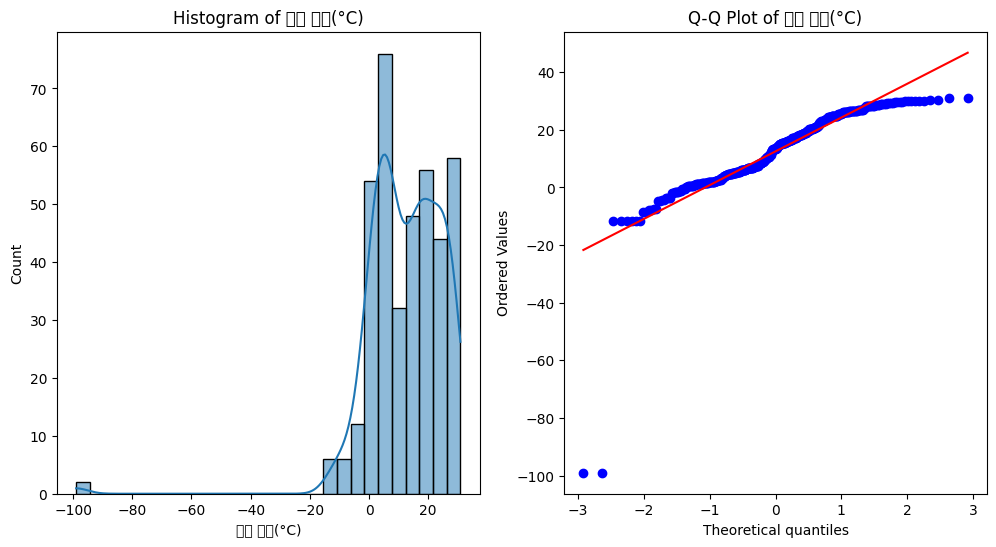

In [6]:
# Visualize the '평균 기온(°C)' column
visualize_distribution(data_raw, '평균 기온(°C)')

In [7]:
#Drop Column
columns_to_drop = ["day","요일",'품목','품종','거래단위','등급','전일_x', "거래단위", "조회일자","지역(시)", "지역(군)", "품목명","전일_y"]

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop, errors='ignore')

drop_columns_transformer = DropColumns(columns_to_drop=columns_to_drop)

In [8]:
#Drop Rows
class DropRows(BaseEstimator, TransformerMixin):
    def __init__(self, column_name, value_to_drop):
        self.column_name = column_name
        self.value_to_drop = value_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return X[X[self.column_name] != self.value_to_drop]
        else:
            raise ValueError("Input should be a pandas DataFrame.")

drop_rows_transformer = DropRows(column_name="등급", value_to_drop="중품")

In [9]:
# Custom transformer to convert 'DATE' to datetime
class ConvertDate(BaseEstimator, TransformerMixin):
    def __init__(self, date_column):
        self.date_column = date_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X[self.date_column] = pd.to_datetime(X[self.date_column], errors='coerce')
        return X

convert_date_transformer = ConvertDate(date_column="DATE")

In [10]:
class DateTimeFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, date_column):
        self.date_column = date_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        date_features = pd.DataFrame({
            'year': X[self.date_column].dt.year,
            'month': X[self.date_column].dt.month,
            'day': X[self.date_column].dt.day,
            'weekday': X[self.date_column].dt.weekday,
            'is_weekend': X[self.date_column].dt.weekday >= 5
        })
        
        X = X.drop(columns=[self.date_column])
        
        X = pd.concat([date_features, X], axis=1)
        
        return X


date_features_transformer = DateTimeFeatures(date_column="DATE")

In [11]:
class DropInvalidTemperature(BaseEstimator, TransformerMixin):
    def __init__(self, temperature_column, threshold):
        self.temperature_column = temperature_column
        self.threshold = threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[X[self.temperature_column] >= self.threshold]

drop_invalid_temperature_transformer = DropInvalidTemperature(temperature_column="평균 기온(°C)", threshold=-50)

In [12]:
from sklearn.preprocessing import LabelEncoder

class BinDayColumn(BaseEstimator, TransformerMixin):
    def __init__(self, day_column):
        self.day_column = day_column
        self.label_encoder = LabelEncoder()

    def fit(self, X, y=None):
        # Define the bins and labels
        bins = [0, 10, 20, 32]
        labels = ['beginning', 'middle', 'end']

        # Create a temporary column for label encoding
        temp_bins = pd.cut(X[self.day_column], bins=bins, labels=labels, right=False)
        
        # Fit the label encoder on the labels
        self.label_encoder.fit(temp_bins)
        
        return self

    def transform(self, X):
        X = X.copy()
        
        # Apply the binning
        bins = [0, 10, 20, 32]
        labels = ['beginning', 'middle', 'end']
        X['day_bin'] = pd.cut(X[self.day_column], bins=bins, labels=labels, right=False)
        
        # Encode the bins
        X['day_bin'] = self.label_encoder.transform(X['day_bin'])
        
        return X

# Instantiate the transformer
bin_day_transformer = BinDayColumn(day_column='day')

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Specify the columns to one-hot encode
columns_to_encode = ['year', 'month', 'weekday']

# Create a ColumnTransformer that applies OneHotEncoder to the specified columns
one_hot_encode_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), columns_to_encode)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

In [14]:
def convert_to_list(value):
    if isinstance(value, np.ndarray):
        return value.tolist()
    return value  # If it's not a NumPy array, return the value unchanged

In [15]:
# Pipeline
pipeline = Pipeline(steps=[
    ('convert_date', convert_date_transformer),  
    ('date_features', date_features_transformer),
    ('drop_invalid_temperature', drop_invalid_temperature_transformer),
    ('bin_days', bin_day_transformer),
    ('drop_rows', drop_rows_transformer),
    ('drop_columns', drop_columns_transformer),
    ('one_hot_encode', one_hot_encode_transformer),
])

# Fit and transform the data
transformed_data = pipeline.fit_transform(data_raw)

# Extract feature names after one-hot encoding
one_hot_encoder = pipeline.named_steps['one_hot_encode'].named_transformers_['onehot']
new_column_names = one_hot_encoder.get_feature_names_out(columns_to_encode)

# Define the remaining column names
remaining_column_names = ['is_weekend', '평균가격', '평균 기온(°C)', '최고 기온(°C)', '최저 기온(°C)', '평균 강수량(mm)', '평균 일조시간(hr)', '평균 습도(%)', '평균 적설량(cm)', '평균 순간최대풍속(m/s)', '총반입량',"'day_bin'"]

# Combine the new column names with the remaining column names
all_column_names = list(new_column_names) + remaining_column_names

# Create DataFrame with the new column names
transformed_df = pd.DataFrame(transformed_data, columns=all_column_names).reset_index(drop=True)
transformed_df = transformed_df.map(convert_to_list)

print(transformed_df.head(10), transformed_df.shape)

   year_2023  year_2024  month_1  month_2  month_3  month_4  month_5  month_6  \
0        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
3        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
5        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
6        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
7        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
8        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
9        0.0        1.0      0.0      0.0      0.0      0.0      0.0      0.0   

   month_7  month_8  ...  평균 기온(°C)  최고 기온(°C)  최저 기온(°C)  평균 강수량(mm)  \
0      0.0      1.0  ...       29.9

In [16]:
transformed_df.dtypes

year_2023         float64
year_2024         float64
month_1           float64
month_2           float64
month_3           float64
month_4           float64
month_5           float64
month_6           float64
month_7           float64
month_8           float64
month_10          float64
month_11          float64
month_12          float64
weekday_0         float64
weekday_1         float64
weekday_2         float64
weekday_3         float64
weekday_4         float64
is_weekend           bool
평균가격               object
평균 기온(°C)         float64
최고 기온(°C)         float64
최저 기온(°C)         float64
평균 강수량(mm)        float64
평균 일조시간(hr)       float64
평균 습도(%)          float64
평균 적설량(cm)        float64
평균 순간최대풍속(m/s)    float64
총반입량              float64
'day_bin'           int64
dtype: object

In [17]:
#Splitting
from sklearn.model_selection import train_test_split

X = transformed_df.drop(columns = ["평균가격"])
y = transformed_df["평균가격"].str.replace(',', '').astype(float)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

## 데이터 트레이닝

사용된 베이스 모델
- Random Forest Regressor
- Gradient Boosting Regressor
- XGB Regressor


In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import KFold

# Shuffle and split data
X, y = shuffle(X, y, random_state=19)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Define base models with hyperparameter search spaces
base_models = [
    ('rf', RandomForestRegressor(random_state=19),
     {"n_estimators": randint(50, 300),
      "max_depth": randint(3, 10)}),
    ('gb', GradientBoostingRegressor(random_state=19),
     {"n_estimators": randint(50, 300),
      "learning_rate": uniform(0.01, 0.1)}),
    ('xgb', XGBRegressor(random_state=19),
     {"n_estimators": randint(50, 300),
      "learning_rate": uniform(0.01, 0.1),
      "max_depth": randint(3, 10)})
]

# Optimize base models
optimized_base_models = []
for name, model, param_dist in base_models:
    search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=50, cv=5, random_state=19, n_jobs=-1, verbose=1)
    search.fit(X_train, y_train)
    optimized_base_models.append((name, search.best_estimator_))

# Meta Model
meta_model = Ridge(random_state=19)

# Create and train stacking model
stacking_model = StackingRegressor(
    estimators=optimized_base_models,
    final_estimator=meta_model,
    cv=KFold(n_splits=5, shuffle=True, random_state=19),
    n_jobs=-1,
    verbose=1
)
stacking_model.fit(X_train, y_train)

# Evaluate model
y_pred = stacking_model.predict(X_test)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


RMSE: 1591.0355384194045
R²: 0.7315085196077207


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [19]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Evaluate model
y_pred = stacking_model.predict(X_test)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

RMSE: 1591.0355384194045
R²: 0.7315085196077207


Test 데이터로 추론

In [20]:
test_data = pd.read_csv("test_data.csv")

test_data_transformed = pipeline.transform(test_data)
test_data_transformed = pd.DataFrame(test_data_transformed, columns=all_column_names).reset_index(drop=True)
test_data_transformed = test_data_transformed.map(convert_to_list)

X_t = test_data_transformed.drop(columns = ["평균가격"])
y_t = test_data_transformed["평균가격"]


In [21]:
#추론 및 데이트
y_pred = stacking_model.predict(X_t)
mse = root_mean_squared_error(y_t, y_pred)
r2 = r2_score(y_t, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1383.5153292451143
R-squared Score: 0.07199823459097354
